In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [4]:
# Load the dataset
mal_mem_df = pd.read_csv('C:/Users/nazih/OneDrive/Desktop/THESIS CODE/data.csv')
mal_mem_df.shape

# Converting data types
mal_mem_df["Class"] = mal_mem_df["Class"].astype("category")

# Check for duplicate rows based on all columns
duplicates = mal_mem_df[mal_mem_df.duplicated(keep=False)]  # keep=False marks all duplicates
print(f"Number of duplicate rows: {len(duplicates)}")


Number of duplicate rows: 1019


In [5]:
# Remove all but the first occurrence
df = mal_mem_df.copy()
df = df.drop_duplicates()
print(f"Rows removed: {len(mal_mem_df) - len(df)}")

Rows removed: 534


In [6]:
print(mal_mem_df.shape)
df.shape

(58596, 57)


(58062, 57)

In [7]:
# Split the category to capture the first word, which signifies the category type
def category(column):
    return column.split("-")[0] if "-" in column else column

In [8]:
# Split the category to capture the second word, which signifies the category name
def category_name(column):
    return column.split("-")[1] if "-" in column else column

In [9]:
# Create new column category to store mawlare type
# Use .loc to avoid the warning
df["category"] = df["Category"].apply(category)

In [10]:
df["category"].value_counts()

category
Benign        29231
Spyware        9815
Ransomware     9529
Trojan         9487
Name: count, dtype: int64

In [11]:
# Creating a column with the names of the variants
df["category_name"] = df["Category"].apply(category_name)
df["category_name"].value_counts()

category_name
Benign          29231
Transponder      2410
Shade            2128
Ako              2000
180solutions     2000
CWS              2000
Refroso          2000
Scar             2000
Gator            1995
Conti            1988
Emotet           1967
Zeus             1950
Maze             1754
Pysa             1659
Reconyc          1570
TIBS             1410
Name: count, dtype: int64

In [12]:
# Drop rows where the category_name is 'Benign'
df = df[df['category_name'] != 'Benign']

# Verify if 'Benign' class has been removed
print(f"Remaining category names in the dataset:\n{df['category_name'].value_counts()}")


Remaining category names in the dataset:
category_name
Transponder     2410
Shade           2128
Ako             2000
180solutions    2000
CWS             2000
Refroso         2000
Scar            2000
Gator           1995
Conti           1988
Emotet          1967
Zeus            1950
Maze            1754
Pysa            1659
Reconyc         1570
TIBS            1410
Name: count, dtype: int64


In [13]:
# Define the label encoder
def label_encoder(column):
    lencode = LabelEncoder().fit(column)
    print(column.name, lencode.classes_)
    return lencode.transform(column)

In [14]:
df.tail(5)

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class,category,category_name
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,24,116,0,120,86,0,8,Malware,Ransomware,Shade
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,24,116,0,116,88,0,8,Malware,Ransomware,Shade
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,24,116,0,120,88,0,8,Malware,Ransomware,Shade
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,24,116,0,120,87,0,8,Malware,Ransomware,Shade
58595,Ransomware-Shade-955d9af38346c1755527bd196668e...,38,15,9.868421,0,213.026316,1487,39.131579,8095,213.026316,...,24,116,0,120,86,0,8,Malware,Ransomware,Shade


In [15]:
# Encoding the columns
# Recommended approach using .loc[]
df['category'] = label_encoder(df['category'])
df['category_name'] = label_encoder(df['category_name'])
df['Class'] = label_encoder(df['Class'])

print(df[['category', 'category_name', 'Class']].head(10))


category ['Ransomware' 'Spyware' 'Trojan']
category_name ['180solutions' 'Ako' 'CWS' 'Conti' 'Emotet' 'Gator' 'Maze' 'Pysa'
 'Reconyc' 'Refroso' 'Scar' 'Shade' 'TIBS' 'Transponder' 'Zeus']
Class ['Malware']
       category  category_name  Class
29298         0              1      0
29299         0              1      0
29300         0              1      0
29301         0              1      0
29302         0              1      0
29303         0              1      0
29304         0              1      0
29305         0              1      0
29306         0              1      0
29307         0              1      0


In [16]:
# Drop the Category and Class columns
df.drop(["Category", "Class"], axis=1, inplace=True)

In [17]:
df.tail()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,category,category_name
58591,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,0,...,26,24,116,0,120,86,0,8,0,11
58592,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,0,...,26,24,116,0,116,88,0,8,0,11
58593,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,0,...,26,24,116,0,120,88,0,8,0,11
58594,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,0,...,26,24,116,0,120,87,0,8,0,11
58595,38,15,9.868421,0,213.026316,1487,39.131579,8095,213.026316,0,...,26,24,116,0,120,86,0,8,0,11


In [18]:
# Separate features and target
X = df.drop("category_name", axis=1)
y = df["category_name"]
X.drop(["category"], axis=1, inplace=True)
X.tail()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
58591,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,0,...,389,221,26,24,116,0,120,86,0,8
58592,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,0,...,389,221,26,24,116,0,116,88,0,8
58593,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,0,...,389,221,26,24,116,0,120,88,0,8
58594,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,0,...,389,221,26,24,116,0,120,87,0,8
58595,38,15,9.868421,0,213.026316,1487,39.131579,8095,213.026316,0,...,389,221,26,24,116,0,120,86,0,8


Selected features: ['pslist.nppid', 'pslist.avg_threads', 'pslist.avg_handlers', 'handles.nport', 'handles.nfile']
F-scores for selected features:
pslist.nppid: F-score=220.3
pslist.avg_threads: F-score=343.0
pslist.avg_handlers: F-score=212.3
handles.nport: F-score=180.1
handles.nfile: F-score=212.3


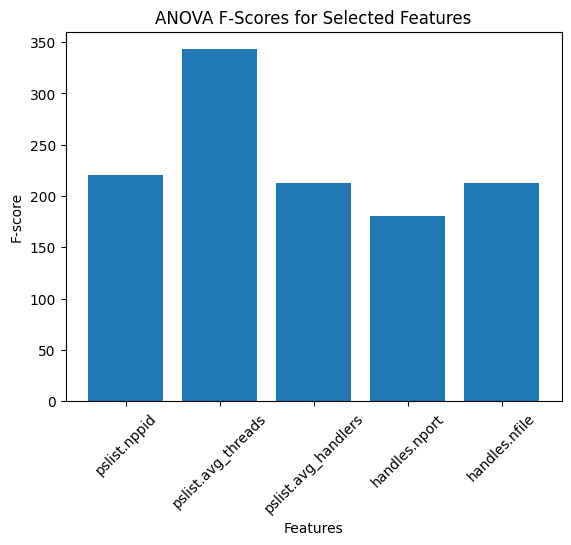

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress specific warnings (if you want)
warnings.filterwarnings("ignore", message="Features .* are constant.")
warnings.filterwarnings("ignore", message="invalid value encountered in divide")

# Step 1: Remove constant features
constant_filter = VarianceThreshold(threshold=0.01)
X_filtered = constant_filter.fit_transform(X)

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Step 3: Handle correlations and drop highly correlated features
corr_matrix = pd.DataFrame(X_scaled).corr().abs()  # Compute correlation on standardized data
upper = corr_matrix.where(np.triu(np.ones_like(corr_matrix, dtype=bool), k=1))  # Fix here: convert to boolean
to_drop = [col for col in upper.columns if any(upper[col] > 0.85)]  # Remove high correlations
X_scaled = pd.DataFrame(X_scaled).drop(columns=to_drop).values  # Drop correlated features after scaling

# Step 4: Select top k features using F-test (ANOVA)
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_scaled, y)

# Step 5: Get the names of the selected features
# Now that we've filtered out correlated features, we need to update `X_scaled` with the correct features.
# Get the selected features' indices and map them to the original feature names
selected_features = [col for col, support in zip(X.columns, selector.get_support()) if support]

print("Selected features:", selected_features)

# F-scores and p-values
f_scores, p_values = f_classif(X_scaled, y)

# Printing F-scores for the selected features
print("F-scores for selected features:")
for feature, f in zip(selected_features, f_scores[selector.get_support()]):
    print(f"{feature}: F-score={f:.1f}")

# Step 6: Plotting F-scores for the selected features
plt.bar(selected_features, f_scores[selector.get_support()])
plt.xticks(rotation=45)
plt.title("ANOVA F-Scores for Selected Features")
plt.xlabel('Features')
plt.ylabel('F-score')
plt.show()


In [20]:
# Split the dataset into training and testing sets, using the usual 80:20 split
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:

'''from imblearn.over_sampling import ADASYN
# Apply ADASYN (Adaptive Synthetic Sampling)
adasyn = ADASYN(random_state=42, sampling_strategy='auto')  # Use 'auto' to balance the classes
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)'''


In [26]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Define the RandomForest model
rf = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=10, min_samples_split=5, n_jobs=-1)

# Define the XGBClassifier model (no need for wrapping)
xgb = XGBClassifier(random_state=42, max_depth=6, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, reg_lambda=1, n_jobs=-1)

# Create a VotingClassifier with only RandomForest and XGBoost
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb),
], voting='soft')  # Soft voting (uses predicted probabilities)

# Fit the Voting Classifier
voting_clf.fit(X_train, y_train)

# Perform cross-validation and check accuracy
cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=3, scoring='accuracy')  # Reduce cv folds for quicker testing
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

# Evaluate on the test set
y_test_pred = voting_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Show classification report
print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_test_pred = voting_clf.predict(X_test)

# Calculate and print the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


In [ ]:
xgb = XGBClassifier().fit(X_scaled, y)
importance = xgb.feature_importances_
top_features = X.columns[importance.argsort()[-5:][::-1]]